# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [3]:
#drop the 'Unnamed:0' column
heroes_df.drop(columns='Unnamed: 0', inplace=True)

In [4]:
heroes_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
...,...,...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0


In [5]:
powers_df

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Yellowjacket II,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
663,Ymir,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
664,Yoda,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
665,Zatanna,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [6]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________

I have chosen to detect and deal with missing data, placeholder entries and duplicate data from the heroes dataframe. The approach, in summary, is to ignore placeholders for categorical data (represented by a '-'), replace placeholders for numerical data (-99.0), delete missing data (only about 17 entries had missing data) and also delete duplicate entries.


## Missing values and the Heroes database

The Heroes database has 734 rows and 11 columns in total.

In [7]:
#find out overview data of the heroes database.
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


Most of the missing data is in the column "Publisher". There appear to be two missing values in the column "Weight".

In [8]:
# See where the missing values are in the dataframe
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

It would appear that missing values are limited and mostly concentrated in the Publisher column.

Detect and identify duplicated entries.

In [9]:
heroes_df.duplicated().value_counts()

False    733
True       1
dtype: int64

In [10]:
# remove duplicate dataset
heroes_df.drop_duplicates(subset = ['name'], inplace = True)
#reset the index after dropping duplicates.
heroes_df.reset_index(drop = True, inplace=True)

Investigate whether there are any placeholders in the dataframe.

In [11]:
for col in heroes_df.columns:
    print(col, '\n', heroes_df[col].value_counts(), '\n')

name 
 Bird-Man II    1
Iceman         1
Skaar          1
Gladiator      1
Spawn          1
              ..
Cerebra        1
Carnage        1
Superboy       1
Ethan Hunt     1
Tigra          1
Name: name, Length: 715, dtype: int64 

Gender 
 Male      491
Female    196
-          28
Name: Gender, dtype: int64 

Eye color 
 blue                       220
-                          165
brown                      125
green                       71
red                         45
black                       22
yellow                      19
white                       16
hazel                        6
grey                         5
purple                       4
gold                         3
amber                        2
yellow (without irises)      2
violet                       2
green / blue                 1
yellow / blue                1
blue / white                 1
yellow / red                 1
indigo                       1
white / red                  1
silver                 

Columns worth investigating further are:
<p>1) 'Weight' - there are 229 entries of a negative weight (-99)</p><p>
</p>2) 'Alignment' - there are 7 entries of no alignment (not even neutral). This is represented in the data by a dash ('-')</p>
<p>3) 'Skin color' - a grand majority of the entries (644) have no identified skin colour and is represented in the data by a dash.</p>
<p>4) 'Publisher' - there are 15 missing entries in the column 'Publisher'</p>
<p>5) 'Height' - there are 209 entries of a negative height (-99)</p><p>
<p>6) 'Hair Color' - there are 166 with no hair colour entry. This is represented in the data by a dash ('-').</p>
<p>7) 'Race' - there are 300 with no entries. This is represented in the data by a dash ('-').</p>
<p>8) 'Eye Color' - there are 165 with no entries. This is represented in the data by a dash ('-').</p>
<p>9) 'Gender' - there are 28 with no entries. This is represented in the data by a dash ('-').</p>
<p>10) 'name' - There should be no repeat names, all duplicates having been removed by this point.</p>
<p> It would appear that the dash ('-') is used as a placeholder in the dataset.
<p> It would also appear that -99.0 is used as a placeholder in certain columns, particularly those that contain numeric values.</p>

## Use of dashes and -99.0 in the database

Is -99.0 actually the weight of a hero or is it a placeholder? Which heroes have a -99 weight?

In [12]:
#observe how -99.0 is used in the data set, in particular, in relation to Weight
heroes_df.loc[heroes_df['Weight']== -99.0]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
14,Alex Mercer,Male,-,Human,-,-99.0,Wildstorm,-,bad,-99.0
15,Alex Woolsly,Male,-,-,-,-99.0,NBC - Heroes,-,good,-99.0
18,Allan Quatermain,Male,-,-,-,-99.0,Wildstorm,-,good,-99.0
...,...,...,...,...,...,...,...,...,...,...
693,Weapon XI,Male,-,-,-,-99.0,Marvel Comics,-,bad,-99.0
694,White Canary,Female,brown,Human,Black,-99.0,DC Comics,-,bad,-99.0
696,Wildfire,Male,-,-,-,-99.0,DC Comics,-,good,-99.0
704,Wondra,Female,-,-,-,-99.0,Marvel Comics,-,good,-99.0


Looking at Alex Mercer's entry, he is human but his weight is listed at -99.0. Even in the realm of superheroes, a human being doesn't weigh -99.0 (although a Frost Giant might :) )

<p> We may conclude that -99.0 is a placeholder value.</p>

In [13]:
# observe how dashes are used in the dataset, in particular, in relation to Skin color
heroes_df.loc[heroes_df['Skin color'] == '-'].tail()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
708,Yellow Claw,Male,blue,-,No Hair,188.0,Marvel Comics,-,bad,95.0
709,Yellowjacket,Male,blue,Human,Blond,183.0,Marvel Comics,-,good,83.0
710,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
713,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0
714,Zoom,Male,red,-,Brown,185.0,DC Comics,-,bad,81.0


The above extract also confirms that the dash is being used as a placeholder where one would expect that because a character is human, such character actually has a skin that would have a colour. It might be the case that some superheroes don't have a skin. 
<p> In this case, Yellowjacket is a human superhero and has blond hair, but a dash against his skin colour. This suggests that dash represents a placeholder for a missing value. Ie, Yellowjacket has a skin colour but the database doesn't record what it is.</p>

## Cleaning up the heroes database

Now that we have ascertained that dashes and -99.0 are placeholders, we can now go on to clean them up together with the actual NaN entries identified above.
<p> From the analysis above, the number of entries containing either a dash or -99.0 is a large one. With the exception of "Gender", removing any datapoint with a dash or -99.0 would create a loss of somewhere between 20 and 30% of the data points. Therefore, removal of datapoints containing placeholders for any column isn't feasible. We would lose too much of our data for analysis.</p>
<p> It is worth observing that dashes have been used for categorical data, while -99.0 has been used to fill in for continuous numerical data.</p>

In [14]:
heroes_df.loc[heroes_df['Hair color'] == 'No Hair'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 711
Data columns (total 10 columns):
name          75 non-null object
Gender        75 non-null object
Eye color     75 non-null object
Race          75 non-null object
Hair color    75 non-null object
Height        75 non-null float64
Publisher     74 non-null object
Skin color    75 non-null object
Alignment     75 non-null object
Weight        75 non-null float64
dtypes: float64(2), object(8)
memory usage: 6.4+ KB


### The approach to dashes - Do nothing

<p>Where dashes have been used, it is difficult to fill in categorical data like hair colour with a sensible replacement without changing the profile of the dataset significantly, especially where so many dashes have been used (ie for Skin color). Therefore, the better approach may be to leave the dashes where they are, to connote an unknown attribute, for instance, an unknown Hair color (incidentally, there are 75 characters with 'No Hair' so leaving the dashes where they are in this case will help preserve the quality of the data.</p>


### The approach to -99.0 placeholders - replace with Median

<p>The approach to where -99.0 as height or weight should be to replace the placeholder with a value that will cause the minimum of distortion to the whole dataset. This will be done in each case by looking at the distribution of values and taking a median Weight (or Height) where a Weight (or Height) is available to use for calculating such median.</p>

<p> This is the approach because leaving the -99.0 placeholders will skew calculations using the numeric values for Weight (or Height). Picking the median reading (for when Weight and Height is available) will cause the least distortion of the dataset as a whole as it relates to Weight (or Height).</p>

<p>However, this approach isn't foolproof. By replacing the placeholders with a median value, we risk making assumptions about the actual weight that may not be correct, especially in the superhero universe, where weight and height may not be normally distributed (and may infact be positively skewed).</p>

First, looking at -99.0 placeholders for both Height and Weight:

In [15]:
heroes_df.loc[(heroes_df['Height'] == -99.0) & (heroes_df['Weight'] == -99.0)]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
14,Alex Mercer,Male,-,Human,-,-99.0,Wildstorm,-,bad,-99.0
15,Alex Woolsly,Male,-,-,-,-99.0,NBC - Heroes,-,good,-99.0
18,Allan Quatermain,Male,-,-,-,-99.0,Wildstorm,-,good,-99.0
...,...,...,...,...,...,...,...,...,...,...
692,Watcher,Male,-,-,-,-99.0,Marvel Comics,-,good,-99.0
693,Weapon XI,Male,-,-,-,-99.0,Marvel Comics,-,bad,-99.0
694,White Canary,Female,brown,Human,Black,-99.0,DC Comics,-,bad,-99.0
696,Wildfire,Male,-,-,-,-99.0,DC Comics,-,good,-99.0


The grand majority of characters with a -99.0 height also have a -99.0 weight. There are 217 characters in total with a -99.0 height, 212 of them also has a -99.0 weight (out of 237 characters with a -99.0 weight).

In [16]:
# These are the 25 characters with a -99.0 weight but *NOT* a -99.0 height
heroes_df.loc[(heroes_df['Height'] != -99.0) & (heroes_df['Weight'] == -99.0)]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
30,Anti-Monitor,Male,yellow,God / Eternal,No Hair,61.0,DC Comics,-,bad,-99.0
67,Batwoman V,Female,green,Human,Red,178.0,DC Comics,-,good,-99.0
114,Bloodwraith,Male,white,-,No Hair,30.5,Marvel Comics,-,bad,-99.0
118,Boba Fett,Male,brown,Human / Clone,Black,183.0,George Lucas,-,bad,-99.0
130,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0
144,Captain Epic,Male,blue,-,Brown,188.0,Team Epic TV,-,good,-99.0
166,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.0
197,Darth Maul,Male,yellow / red,Dathomirian Zabrak,-,170.0,George Lucas,red / black,bad,-99.0
222,Dormammu,Male,yellow,-,No Hair,185.0,Marvel Comics,-,bad,-99.0
235,Ethan Hunt,Male,brown,Human,Brown,168.0,NaN,-,good,-99.0


In [17]:
# These are the 5 characters with a -99.0 height but *NOT* a -99.0 weight
heroes_df.loc[(heroes_df['Height'] == -99.0) & (heroes_df['Weight'] != -99.0)]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
51,Atom IV,Male,brown,-,Black,-99.0,DC Comics,-,good,72.0
334,Iron Monger,Male,blue,-,No Hair,-99.0,Marvel Comics,-,bad,2.0
635,T-800,Male,red,Cyborg,-,-99.0,Dark Horse Comics,-,bad,176.0
636,T-850,Male,red,Cyborg,-,-99.0,Dark Horse Comics,-,bad,198.0
637,T-X,Female,-,Cyborg,-,-99.0,Dark Horse Comics,silver,bad,149.0


min         2.00000
max       900.00000
mean      112.85124
median     81.00000
Name: Weight, dtype: float64


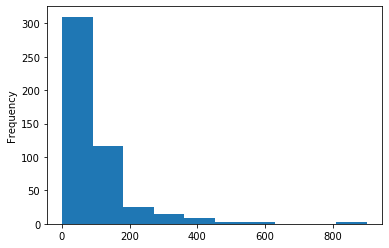

In [18]:
# We want to create a subset of heroes which *DO* have their weights and not just a placeholder
# what are the measures of central dispersion for Weight for this subset?
# what does the distribution of the Weight looks like across the dataset with all the placeholders removed?
with_weights = heroes_df[heroes_df['Weight'] != -99.0]
with_weights_disp = with_weights.agg(['mean','median','min','max'])
print(with_weights_disp['Weight'])
with_weights['Weight'].plot(kind='hist')

It looks like there are a few outliers with weights more than 300. How many superheroes are there that weight more than 300?

In [19]:
with_weights.loc[with_weights['Weight'] > 300].count()

name          28
Gender        28
Eye color     28
Race          28
Hair color    28
Height        28
Publisher     28
Skin color    28
Alignment     28
Weight        28
dtype: int64

Will the data be more representative if we exclude heroes with weights more than 300?

In [20]:
with_weights_300 = with_weights[with_weights['Weight'] < 300]
print(with_weights_300['Weight'].agg(['mean','median','min','max']))

mean       91.640351
median     81.000000
min         2.000000
max       293.000000
Name: Weight, dtype: float64


The median of the subset of heroes with the outliers stripped out is the same as the median of the subset of heroes with actual weights recorded (81 in each case). It made no difference that we stripped out the outliers. Therefore, it seems like the median is a reasonable replacement for the -99.0 placeholder for weights.

In [21]:
#replace the weight placeholder with the median 81
#compare the distribution now with the previous distribution of weights to ensure this has been done correctly.
heroes_df.loc[heroes_df['Weight'] == -99.0, 'Weight'] = 81
heroes_df['Weight'].value_counts()

81.0     251
54.0      23
79.0      23
90.0      19
52.0      15
        ... 
412.0      1
38.0       1
96.0       1
320.0      1
855.0      1
Name: Weight, Length: 132, dtype: int64

The same approach can be taken to replacing the placeholder -99.0 values for Height.

min        15.200000
max       975.000000
mean      186.884387
median    183.000000
Name: Height, dtype: float64


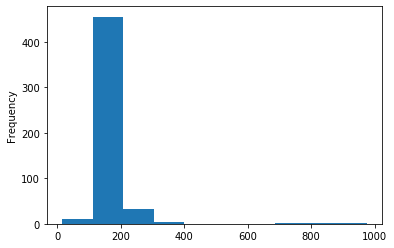

In [22]:
# the following shows the central disperson and distribution of Heights for characters with a specified Height
with_heights = heroes_df[heroes_df['Height'] != -99.0]
with_heights_disp = with_heights.agg(['mean','median','min','max'])
print(with_heights_disp['Height'])
with_heights['Height'].plot(kind='hist')

Reviewing the histogram above, the distribution for Height isn't as skewed as it is for Weight. Stripping out the outliers didn't make a difference to the median value then and should make even less of a difference to the median value of Height. Therefore, the median of this subset of characters, for which a Height is available, should be a good proxy to use to fill in the placeholder -99.0. This median value is 183.

In [23]:
# replace the height placeholder with the median 183
# compare the distribution now with the previous distribution of weights to ensure this has been done correctly.
heroes_df.loc[heroes_df['Height'] == -99.0, 'Height'] = 183
heroes_df['Height'].value_counts()

183.0    268
188.0     49
180.0     38
178.0     37
185.0     35
175.0     34
168.0     29
165.0     26
170.0     24
193.0     20
191.0     20
173.0     17
198.0     17
196.0     11
201.0     11
163.0      7
213.0      7
203.0      5
211.0      5
157.0      4
244.0      4
229.0      3
155.0      3
218.0      3
226.0      3
122.0      2
30.5       2
206.0      2
305.0      2
137.0      2
279.0      2
366.0      2
234.0      1
297.0      1
267.0      1
304.8      1
701.0      1
61.0       1
876.0      1
259.0      1
15.2       1
287.0      1
71.0       1
257.0      1
66.0       1
160.0      1
140.0      1
64.0       1
142.0      1
62.5       1
108.0      1
79.0       1
975.0      1
Name: Height, dtype: int64

From the analysis above, there are 15 missing values in relation to the Publisher and 2 in relation to the Weight. Its probably safe to drop the 17 data points from the 734 entries available in the whole set without distorting the data unduly.

In [24]:
# Its probably safe to drop rows where there are missing values either in relation to the publisher or to the Weight.
# Dropping entries where there are missing values for the Publisher or Weight.
heroes_clean_df = heroes_df.dropna()

In [25]:
heroes_clean_df.reset_index(drop=True, inplace=True)
heroes_clean_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,183.0,Marvel Comics,-,bad,81.0
...,...,...,...,...,...,...,...,...,...,...
695,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
696,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,81.0
697,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
698,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0


Therefore, the clean dataframe, stripped of all placeholder values, duplicate values and missing entries should be a 718 entry dataframe called "heroes_clean_df"

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [26]:
# use inner join because you want to join up the heroes that exist in heroes_clean_df with the respective
# powers in powers_df. Powers_df contains heroes that don't exist in heroes_clean_df. 
# Since we don't want heroes in powers_df that don't appear in heroes_clean_df, we can exclude them by executing an inner join
# thus ensuring that the heroes in the joined df appear in both powers_df and heroes_clean_df
joined_df = heroes_clean_df.join(powers_df, how='inner')

In [27]:
joined_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,183.0,Marvel Comics,-,bad,81.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Vindicator,Female,green,Human,Red,165.0,Marvel Comics,-,good,54.0,...,False,False,False,False,False,False,False,False,False,False
663,Violator,Male,-,-,-,183.0,Image Comics,-,bad,81.0,...,False,False,False,False,False,False,False,False,False,False
664,Violet Parr,Female,violet,Human,Black,137.0,Dark Horse Comics,-,good,41.0,...,False,False,False,False,False,False,False,False,False,False
665,Vision,Male,gold,Android,No Hair,191.0,Marvel Comics,red,good,135.0,...,False,False,False,False,False,False,False,False,False,False


Are there any missing values in the joined_df?

In [28]:
# chaining 2 any() methods like that is very useful
joined_df.isna().any().any()

False

In [29]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 667 entries, 0 to 666
Columns: 178 entries, name to Omniscient
dtypes: bool(167), float64(2), object(9)
memory usage: 171.3+ KB


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

<Figure size 1080x288 with 0 Axes>

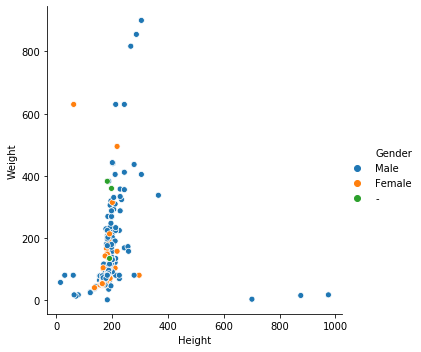

In [30]:
plt.figure(figsize = (15,4))
sns.relplot(x= 'Height', y= 'Weight', data = joined_df, hue= 'Gender')

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [31]:
male_heroes_df = joined_df.loc[joined_df['Gender']=='Male']
female_heroes_df = joined_df.loc[joined_df['Gender']=='Female']
def show_distplot(dataframe, gender, column_name):
    if gender == 'Male':
        dataframe = male_heroes_df
    if gender == 'Female':
        dataframe = female_heroes_df
    return dataframe.plot(kind='hist', y=column_name)

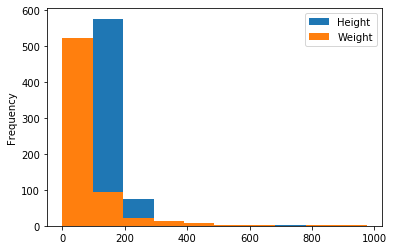

In [32]:
# This is a sample plot of the joined df as a whole. 
# Since Height and Weight are the only numeric values, it will only plot frequencies by Height and Weight.
# This is useful as a sanity check for when multiple plots are developed for the Height and Weight of each character by gender.
joined_df.plot(kind='hist')

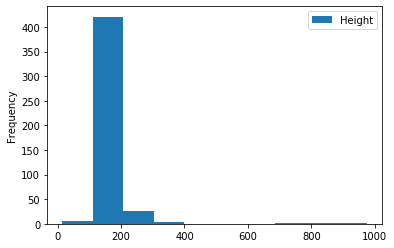

In [33]:
# Male Height
show_distplot(joined_df,'Male','Height')

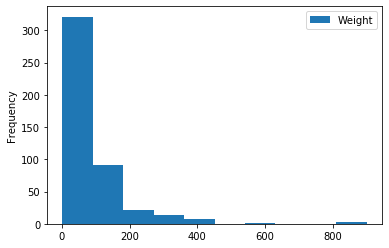

In [34]:
# Male Weight
show_distplot(joined_df,'Male','Weight')

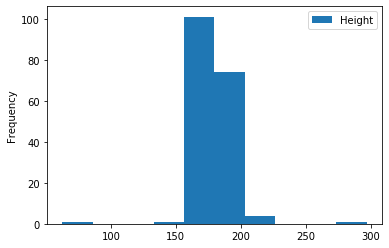

In [35]:
# Female Height
show_distplot(joined_df,'Female','Height')

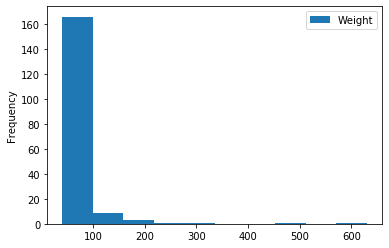

In [36]:
# Female Weight
show_distplot(joined_df,'Female','Weight')

Determine the measures of central dispersion for both male and female heroes below:

In [37]:
male_heroes_df[['Height','Weight']].describe()

,Height,Weight
count,460.000000,460.000000
mean,190.279783,112.850000
std,59.775912,97.010552
min,15.200000,2.000000
25%,183.000000,81.000000
50%,183.000000,81.000000
75%,188.000000,101.000000
max,975.000000,900.000000


In [38]:
# the most commonly occuring Height/Weight among Male characters is 183/81. 
#This would be the case since we replaced many placeholders with the median weight (81) and the median height (183)
male_heroes_df[['Height','Weight']].mode()

,Height,Weight
0,183.0,81.0


In [39]:
female_heroes_df[['Height','Weight']].describe()

,Height,Weight
count,182.000000,182.000000
mean,176.288462,78.703297
std,15.896959,61.039068
min,62.500000,41.000000
25%,168.000000,55.000000
50%,175.000000,63.000000
75%,183.000000,81.000000
max,297.000000,630.000000


In [40]:
#As was the case with Male characters, the most commonly occuring Height/Weight among Female characters is 183/81. 
#This would be the case since we replaced many placeholders with the median weight (81) and the median height (183)
male_heroes_df[['Height','Weight']].mode()

,Height,Weight
0,183.0,81.0


Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________
<p>Based on just the shape of thie histograms, the distribution of Weight is more positively skewed for Male compared to Female characters. Most male characters fall into a weight range between 0 and 200. Most female characters fall into a weight range between 0 and 100. This is born out by both the median and mean Weights of the Male heroes, which are greater than the equivalents for Female heroes.</p>

<p>Male characters have a range of Heights between 100 and 300 while Female characters have a range of Heights which are more tightly packed in between 150 and 200.

    
<p>While the max values for Weight and Height are fantastical (in real world terms) for both Male and Female characters, the min values for Weight and Height are especially implausible in the case of Male characters (when they are compared to Female characters).</p>

<p> It is worth nothing here that whilst the mode was determined for both Male and Female characters, the mode is not useful for analysis because the most commonly occuring value for both Weight and Height will correspond to the median value that was used to replace the placeholder -99.0 value for both Height and Weight.</p>

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

## 5 most common powers overall

In [41]:
#write a function top_5
#this will take the dataframe provided, drop all columns except columns where powers are recorded
#sum along each power column. Since True = 1 and False = 0, this will just simply count the numbers of True for each power.
#the function then returns the top 5 from a sorted descending list, 

def top_5(dataframe):
    df = dataframe.drop(joined_df.columns.values[0:11], axis=1)
    powers_dist = {}
    for col in df.columns.values:
        powers_dist[col] = df[col].sum()
    return sorted(powers_dist.items(), key=lambda x: x[1], reverse=True)[:5]

In [42]:
top_5(joined_df)

[('Super Strength', 360),
 ('Stamina', 289),
 ('Durability', 257),
 ('Super Speed', 249),
 ('Agility', 242)]

The five most common powers <strong>overall</strong>, in descending order are <strong>'Super Strength', 'Stamina', 'Durability', 'Super Speed', 'Agility'.</strong>

## 5 most common powers in the Marvel Universe

In [44]:
#first, create a dataframe of only marvel characters from heroes_df
marvel_df = joined_df[joined_df['Publisher'] == 'Marvel Comics']

#apply the function to the marvel df
top_5(marvel_df)

[('Super Strength', 203),
 ('Stamina', 155),
 ('Durability', 144),
 ('Agility', 129),
 ('Super Speed', 129)]

The five most common powers <strong>in the Marvel Universe</strong>, in descending order are <strong>'Super Strength', 'Stamina', 'Durability', 'Agility', 'Super Speed'.</strong> This is the same as the overall result.

## 5 most common powers in the DC universe

In [45]:
#first, create a dataframe of only DC characters from heroes_df
dc_df = joined_df[joined_df['Publisher'] == 'DC Comics']

#apply the function to the dc df
top_5(dc_df)

[('Super Strength', 93),
 ('Stamina', 87),
 ('Agility', 77),
 ('Super Speed', 77),
 ('Durability', 69)]

The five most common powers <strong>in the DC Universe</strong>, in descending order are <strong>'Super Strength', 'Stamina', 'Agility', 'Super Speed','Durability', .</strong> These are the same five powers before previously, but in a slightly different order

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________
The five most common powers in the Marvel universe are the same five powers, in the same descending order as in the overall database. The five most common powers in the DC universe are also the same five powers, but are in a slightly different order.

### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________

What is the distribution of skin colors amongst alien heroes?

Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

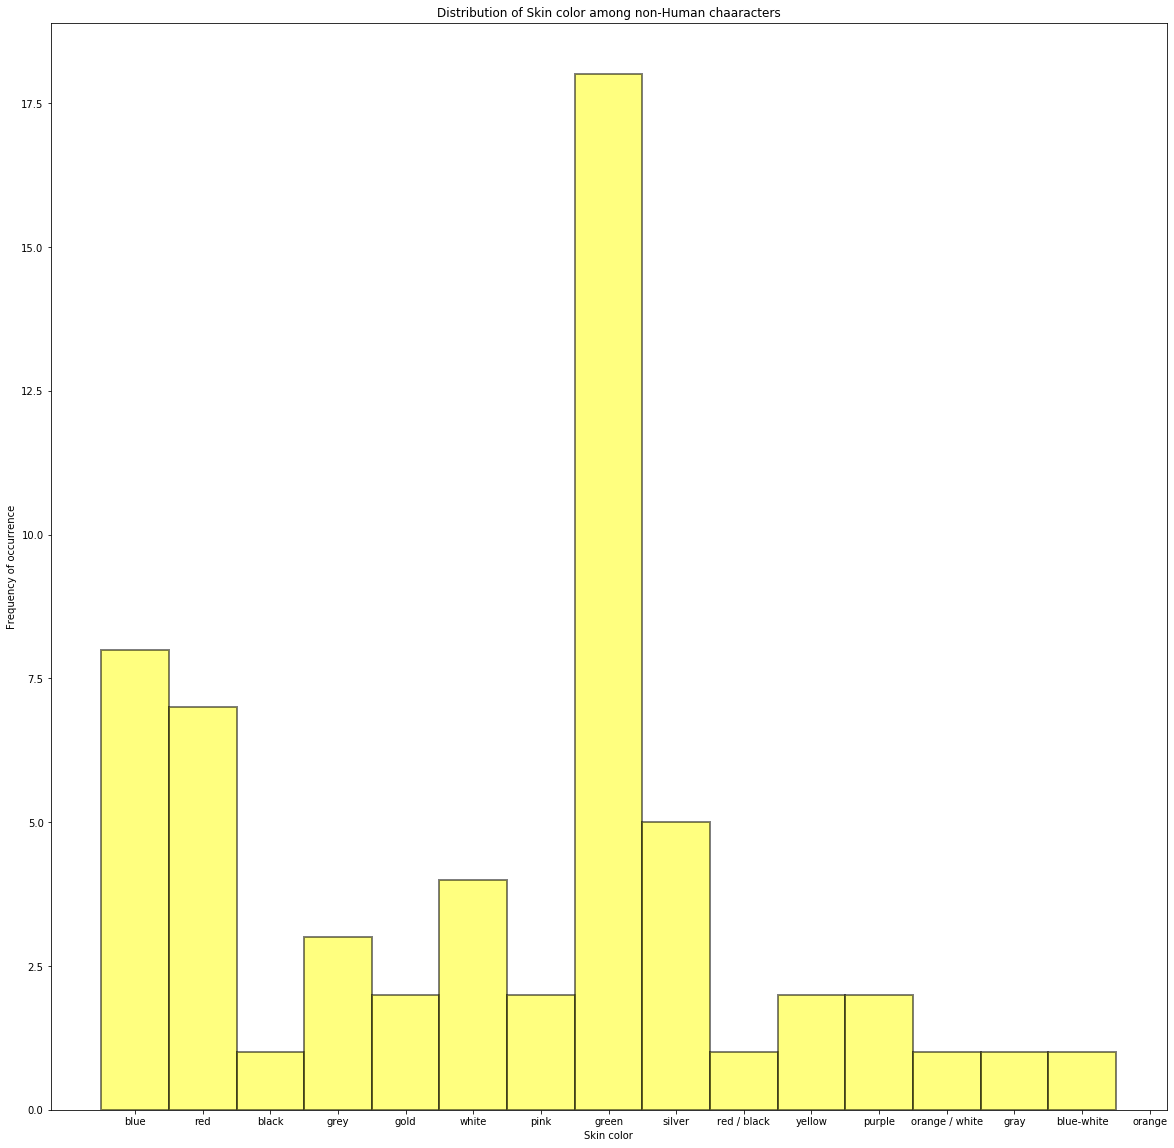

In [295]:
# create a dataframe from the joined dataframe. This dataframe will be of non-Human characters, where the skin color is known.
alien_skin = joined_df.loc[(joined_df['Race'] != 'Human') & (joined_df['Skin color'] != '-')]

# plot a histogram of this datafame
plt.figure(figsize = (20,20))
plt.title('Distribution of Skin color among non-Human chaaracters')
plt.ylabel('Frequency of occurrence')
plt.xlabel('Skin color')
plt.hist(x = alien_skin['Skin color'], color = 'yellow', bins=np.arange(16)-0.5 , edgecolor = 'black', linewidth = 2, alpha = 0.5)
plt.show()

## Miscellaneous

<p> I initially attempted to solve the question: "Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?"</p>

<p> I decided to move on from that because I got stuck, however, I did write several nifty functions to help navigate the database. I have kept them below. </p>

In [207]:
# this function plots the correlation between powers for a certain set of characters in a dataframe
def pow_corr(dataframe):
    df = dataframe.drop(joined_df.columns.values[0:11], axis=1)
    data = df[df.columns.values]
    return data.corr(method='pearson')

In [301]:
#write function to list out what are the powers of each character
#function returns that list in a dictionary where each character is set against a list of powers

def char_powers_dict(dataframe):
    rows = list(dataframe.index)
    powers_dict = {}
    for r in rows:
        powers_list = []
        char = dataframe.loc[r].to_dict() 
        for key,value in char.items():
            if value == 1:
                powers_list.append(key)
        powers_dict[dataframe.loc[r][0]] = powers_list
    return powers_dict

# write a function which returns a character's powers from the joined database and his/her(/its!) name

def ind_powers(hero):
    p_dict = char_powers_dict(joined_df)
    powers = p_dict[hero]
    return list(powers)

# write a function what would allow one to search for heroes by power given the dataframe and a user-input power
# This function will also tell you how many heros have this power.
def search_power(dataframe):
    power = input('Search for superheros with this power ')
    str_power = str(power)
    p_dict = char_powers_dict(dataframe)
    heroes = []
    for k,v in p_dict.items():
        if str_power in v:
            heroes.append(k)
    number = len(heroes)
    summary = print('There are {} characters with this power.'.format(number))
    return heroes

# write a loop that iterates through powers_dict and returns a p_count_dict
# this would be a dictionary setting out the number of powers per character
def powers_per_hero(dataframe):
    p_count_dict = {}
    powers_dict = char_powers_dict(dataframe)
    for key, value in powers_dict.items():
        number = len(value)
        p_count_dict[key] = number
    return p_count_dict

In [247]:
# this code takes the power dictionary and sorts the *values* and arranges the dictionary by *values*
# this then takes the sorted dictionary and works out the frequency of each combination of powers

pow_dict = char_powers_dict(joined_df)
sorted_dict = {k: v for k, v in sorted(pow_dict.items(), key=lambda item: item[1])}
sorted_list = list(sorted_dict.values())
freq = [sorted_list.count(s) for s in sorted_list]


In [186]:
# The ind_powers function can be used to compare powers between heroes in different databases

ind_powers('Moloch') == ind_powers('Synch')

True

In [303]:
ind_powers('Kylo Ren')

['Durability',
 'Longevity',
 'Intelligence',
 'Super Strength',
 'Duplication',
 'Stamina',
 'Enhanced Senses',
 'Immortality',
 'Invulnerability',
 'Self-Sustenance',
 'Regeneration',
 'Toxin and Disease Resistance',
 'Omnilingualism']

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data